# Compare INMAP and BenMAP mortality output

Author : Yunha Lee 

Date: Mar 26, 2025

INMAP mortality is based on Krewski et al. (2009).
 - using a Cox proportional hazards model and assuming a 6% increase in overall mortality for every 10 μg/m³ increase in PM2.5 concentration 
 - for the adults aged 30 and older  (double check this)

BenMAP mortality is based on Di et al. (2017)
 - causal inference methods (e.g., doubly robust approaches, machine learning techniques) and a log-linear exposure-response function.
 - aged 65 and older
 - The estimated risk is higher than Krewski et al. (2009)
 - adverse effects even at low PM₂.₅ concentrations


**Important note:** The comparisons will be done for total health impact, not by regions because different grid resolutions.  INMAP output is varying grids, while BenMAP output is at county-level (can be coarser than INMAP).

Next step : I plan to include BenMAP with Pope et al (2019), which includes younger population
  
 
 

## Step 1: Read INMAP mortality sums

In [104]:
import pandas as pd
import os

main_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/model_analysis/'
run_list = ['CO_CCS', 'CO_CCS_wo_NH3_VOC', 'CO_Suncor_CCS_wo_NH3_VOC','CO_Cherokee_CCS_wo_NH3_VOC', 'NEI_no_Landfill_2001411']
target_file = 'mortality_sums.csv'

combined_df = None

for run in run_list:
    output_path = os.path.join(main_dir, run)
    df = pd.read_csv(output_path + '/'+target_file, header=None)

    df.columns = ["Race", "INMAP_Krewski: "+run]

    # Merge on 'Species' column
    if combined_df is None:
        combined_df = df  # First dataframe, set as base
    else:
        combined_df = pd.merge(combined_df, df, on="Race", how="outer")

combined_df.dropna(inplace=True)
print(combined_df)

         Race  INMAP_Krewski: CO_CCS  INMAP_Krewski: CO_CCS_wo_NH3_VOC  \
0      AsianD               0.475847                         -0.165865   
1      BlackD               1.439416                         -0.551137   
2     LatinoD               3.951309                         -1.679064   
3     NativeD               0.081616                         -0.035150   
4   TotalPopD              15.015228                         -5.951653   
5  WhitNoLatD               8.665428                         -3.366428   

   INMAP_Krewski: CO_Suncor_CCS_wo_NH3_VOC  \
0                                -0.050331   
1                                -0.203833   
2                                -0.532235   
3                                -0.011291   
4                                -1.858981   
5                                -1.011101   

   INMAP_Krewski: CO_Cherokee_CCS_wo_NH3_VOC  \
0                                  -0.083549   
1                                  -0.272251   
2             

In [105]:
rename_inmap ={'TotalPopD': 'ALL', 'AsianD': 'ASIAN','BlackD':'BLACK', 'NativeD':"NATAMER", 'LatinoD': "HISPANIC",'WhitNoLatD':'WHITE'}

# change INMAP race value to match BenMAP
combined_df['Race'] = combined_df['Race'].replace(rename_inmap)

# Change the sign of value to match BenMAP
for name in combined_df.columns:
    if name != 'Race': 
        combined_df[name] = combined_df[name] * -1 # convert negative value to positive 

combined_df

,Race,INMAP_Krewski: CO_CCS,INMAP_Krewski: CO_CCS_wo_NH3_VOC,INMAP_Krewski: CO_Suncor_CCS_wo_NH3_VOC,INMAP_Krewski: CO_Cherokee_CCS_wo_NH3_VOC,INMAP_Krewski: NEI_no_Landfill_2001411
0,ASIAN,-0.475847,0.165865,0.050331,0.083549,0.295903
1,BLACK,-1.439416,0.551137,0.203833,0.272251,0.661691
2,HISPANIC,-3.951309,1.679064,0.532235,0.916534,1.070564
3,NATAMER,-0.081616,0.035150,0.011291,0.015706,0.022588
4,ALL,-15.015228,5.951653,1.858981,2.864803,5.742322
5,WHITE,-8.665428,3.366428,1.011101,1.501783,3.453750


## Step 2: Read BenMAP mortality sums

In [106]:
benmap_file = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/BenMAP/county/incidence_results/Health_Benefit_all_CO_runs.csv'

df_benmap = pd.read_csv(benmap_file)

df_benmap['Endpoint'] = df_benmap['Endpoint'].str.strip()

print(df_benmap['Endpoint'])

# delete the first column and Endpoint, which is just row number
df_benmap = df_benmap.drop(df_benmap.columns[0], axis=1)



def subset_clean_benmap_df(df, author_name):
    # subset mortality using author 
    df = df[df['Endpoint'].str.contains(author_name, na=False)]

    # delete the Endpoint column
    df = df.drop(df.columns[0], axis=1)

    # rename columns to contain benmap
    for name in df.columns:
        if name != 'Race': 
            df.rename(columns={name: f"BenMAP_{author_name}: " + name}, inplace=True)

    return df

df_benmap_Di = subset_clean_benmap_df(df_benmap, 'Di')
df_benmap_Pope = subset_clean_benmap_df(df_benmap, 'Pope')

merged_benmap_df = pd.merge(df_benmap_Di, df_benmap_Pope, on='Race', how='inner')
print(merged_benmap_df)


0                   Asthma Exacerbation  Cough
1                   Asthma Exacerbation  Cough
2     Asthma Exacerbation  Shortness of Breath
3     Asthma Exacerbation  Shortness of Breath
4                  Asthma Exacerbation  Wheeze
5             Mortality All Cause by Di et al.
6             Mortality All Cause by Di et al.
7             Mortality All Cause by Di et al.
8             Mortality All Cause by Di et al.
9             Mortality All Cause by Di et al.
10            Mortality All Cause by Di et al.
11          Mortality All Cause by Pope et al.
12          Mortality All Cause by Pope et al.
13          Mortality All Cause by Pope et al.
14          Mortality All Cause by Pope et al.
15          Mortality All Cause by Pope et al.
16          Mortality All Cause by Pope et al.
17                              Work Loss Days
Name: Endpoint, dtype: object
       Race  BenMAP_Di: CO_CCS  BenMAP_Di: CO_CCS_wo_NH3_VOC  \
0       ALL           -6.99000                       2.70700

{'CO_Cherokee_CCS_wo_NH3_VOC', 'NEI_no_Landfill_2001411', 'CO_Suncor_CCS_wo_NH3_VOC', 'CO_CCS_wo_NH3_VOC', 'CO_CCS'}
checking subset           INMAP_Krewski: CO_Cherokee_CCS_wo_NH3_VOC  \
Race                                                  
ALL                                        2.864803   
WHITE                                      1.501783   
BLACK                                      0.272251   
ASIAN                                      0.083549   
NATAMER                                    0.015706   
HISPANIC                                   0.916534   

          BenMAP_Di: CO_Cherokee_CCS_wo_NH3_VOC  \
Race                                              
ALL                                    1.140000   
WHITE                                  0.934000   
BLACK                                  0.298100   
ASIAN                                  0.033550   
NATAMER                                0.009692   
HISPANIC                               0.252400   

          BenMAP_

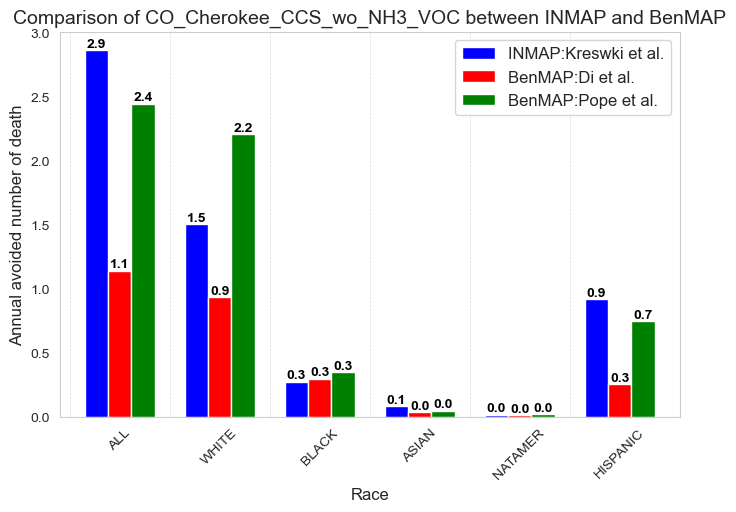

checking subset           INMAP_Krewski: NEI_no_Landfill_2001411  \
Race                                               
ALL                                     5.742322   
WHITE                                   3.453750   
BLACK                                   0.661691   
ASIAN                                   0.295903   
NATAMER                                 0.022588   
HISPANIC                                1.070564   

          BenMAP_Di: NEI_no_Landfill_2001411  \
Race                                           
ALL                                  4.73100   
WHITE                                3.99100   
BLACK                                0.87210   
ASIAN                                0.15710   
NATAMER                              0.02933   
HISPANIC                             0.59350   

          BenMAP_Pope: NEI_no_Landfill_2001411  
Race                                            
ALL                                    9.47100  
WHITE                              

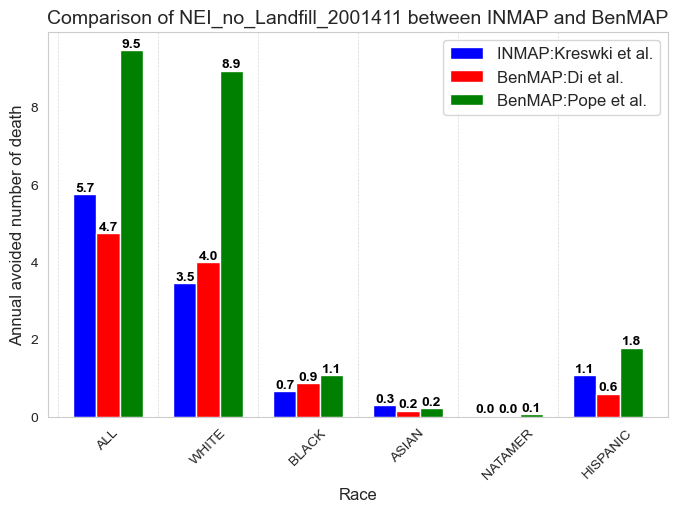

checking subset           INMAP_Krewski: CO_Suncor_CCS_wo_NH3_VOC  \
Race                                                
ALL                                      1.858981   
WHITE                                    1.011101   
BLACK                                    0.203833   
ASIAN                                    0.050331   
NATAMER                                  0.011291   
HISPANIC                                 0.532235   

          BenMAP_Di: CO_Suncor_CCS_wo_NH3_VOC  \
Race                                            
ALL                                  0.877700   
WHITE                                0.721600   
BLACK                                0.237200   
ASIAN                                0.023990   
NATAMER                              0.007534   
HISPANIC                             0.179700   

          BenMAP_Pope: CO_Suncor_CCS_wo_NH3_VOC  
Race                                             
ALL                                     1.87400  
WHITE           

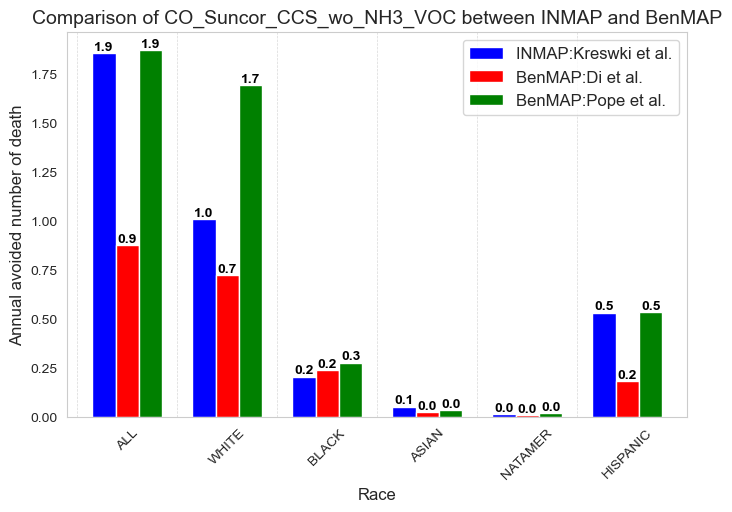

checking subset           INMAP_Krewski: CO_CCS_wo_NH3_VOC  BenMAP_Di: CO_CCS_wo_NH3_VOC  \
Race                                                                       
ALL                               5.951653                       2.70700   
WHITE                             3.366428                       2.27300   
BLACK                             0.551137                       0.65640   
ASIAN                             0.165865                       0.07088   
NATAMER                           0.035150                       0.02257   
HISPANIC                          1.679064                       0.52100   

          BenMAP_Pope: CO_CCS_wo_NH3_VOC  
Race                                      
ALL                              5.70000  
WHITE                            5.28200  
BLACK                            0.76490  
ASIAN                            0.10140  
NATAMER                          0.04889  
HISPANIC                         1.53900  


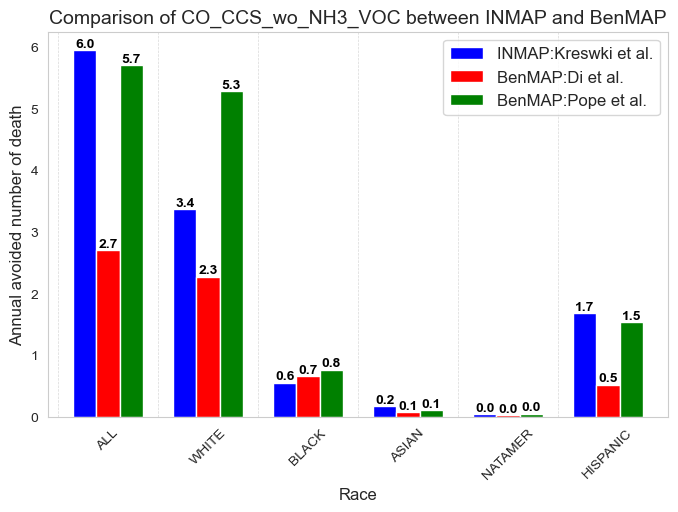

checking subset           INMAP_Krewski: CO_CCS  BenMAP_Di: CO_CCS  BenMAP_Pope: CO_CCS
Race                                                                   
ALL                  -15.015228           -6.99000             -14.6200
WHITE                 -8.665428           -5.85700             -13.5500
BLACK                 -1.439416           -1.70400              -1.9890
ASIAN                 -0.475847           -0.18880              -0.2687
NATAMER               -0.081616           -0.05404              -0.1167
HISPANIC              -3.951309           -1.29900              -3.8190


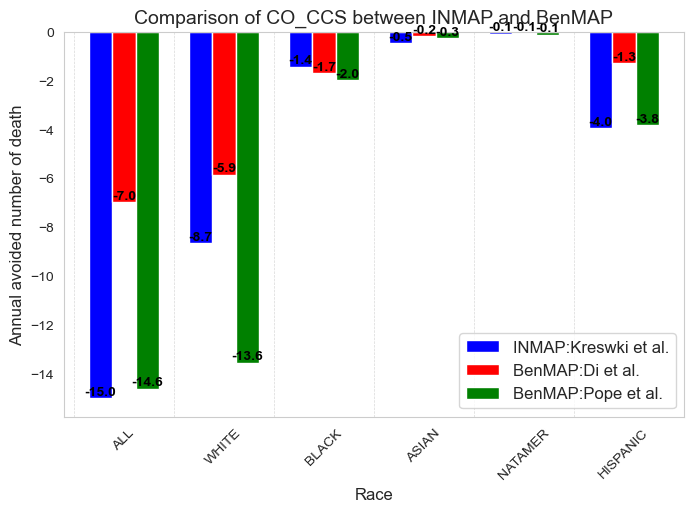

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# combine two dataframe
merged_df = combined_df.merge(merged_benmap_df, on="Race", how="inner")

# Set seaborn style
sns.set_style("whitegrid")

# Convert the column to categorical with the specified order
race_order = ["ALL","WHITE",  "BLACK", "ASIAN", "NATAMER", "HISPANIC"]
merged_df['Race'] = pd.Categorical(merged_df['Race'], categories=race_order, ordered=True)

# Sort the DataFrame by the ordered Race column
merged_df = merged_df.sort_values(by='Race')

# Ensure "Race" is the index
merged_df.set_index("Race", inplace=True)


# Extract unique run names, excluding "Race"
run_names = set(col.split(": ")[1] for col in merged_df.columns if ": " in col)

print(run_names)

# Plot comparison for each run
for run in run_names:
    inmap_col = f"INMAP_Krewski: {run}"
    benmap_col = f"BenMAP_Di: {run}"
    benmap_col2 = f"BenMAP_Pope: {run}"
    
    if inmap_col in merged_df.columns and benmap_col in merged_df.columns:
        # Create a new DataFrame for plotting
        plot_df = merged_df[[inmap_col, benmap_col, benmap_col2]]

        print("checking subset", plot_df)

        # Plot
        ax = plot_df.plot(kind="bar", figsize=(8, 5), width=0.7, color=["Blue", "Red", "Green"])  # Blue & Orange for better contrast
        plt.title(f"Comparison of {run} between INMAP and BenMAP", fontsize=14)
        plt.xlabel("Race", fontsize=12)
        plt.ylabel("Annual avoided number of death", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(["INMAP:Kreswki et al.", "BenMAP:Di et al.", "BenMAP:Pope et al."], fontsize=12)
        #plt.grid(axis="y", linestyle="--", alpha=0.7)
        ax.grid(False)  # Completely removes the grid
        
        # Add subtle vertical gridlines between categories
        for i in range(len(ax.get_xticks())):
            ax.axvline(x=i - 0.5, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

        # Add value labels on top of bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

        plt.show()
